In [2]:
import pandas as pd
#from ReliefF import ReliefF
import sklearn_relief as relieff
import numpy as np
import matplotlib.pyplot as plt

Večino spodnjega je obdelava za relif, ker sem poskušal najti najboljše atribute za predvidevanje nesreč

In [3]:
data20 = pd.read_csv('./Podatki/pn2020.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
data19= pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#odkomenteri za boljše rezultated od relif-a
# data18= pd.read_csv('./Podatki/pn2018.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data17= pd.read_csv('./Podatki/pn2017.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data16= pd.read_csv('./Podatki/pn2016.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data15= pd.read_csv('./Podatki/pn2015.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data14= pd.read_csv('./Podatki/pn2014.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data13= pd.read_csv('./Podatki/pn2013.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data12= pd.read_csv('./Podatki/pn2012.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data11= pd.read_csv('./Podatki/pn2011.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data10= pd.read_csv('./Podatki/pn2010.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data9= pd.read_csv('./Podatki/pn2009.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#data = pd.concat([data20,data19,data18,data17,data16,data15,data14,data13,data12,data11,data10,data9])
data = pd.concat([data20,data19])
clean_data=data

In [4]:
clean_data

,ZaporednaStevilkaPN,KlasifikacijaNesrece,UpravnaEnotaStoritve,DatumPN,UraPN,VNaselju,Lokacija,VrstaCesteNaselja,SifraCesteNaselja,TekstCesteNaselja,...,Spol,UEStalnegaPrebivalisca,Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu,VozniskiStazVLetih,VozniskiStazVMesecih,VrednostAlkotesta,VrednostStrokovnegaPregleda
0,1,Z MATERIALNO ŠKODO,NOVA GORICA,2020-02-20,20.15,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,37075,NOVA GORICA,...,ŽENSKI,NOVA GORICA,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,NEZNANO,8,5,",00",",00"
1,2,Z LAŽJO TELESNO POŠKODBO,SLOVENJ GRADEC,2020-01-02,12.45,NE,CESTA,REGIONALNA CESTA III. REDA,00701,RUTA-PESEK-ROGLA-ZEČE,...,MOŠKI,LENART,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,12,9,",00",",00"
2,2,Z LAŽJO TELESNO POŠKODBO,SLOVENJ GRADEC,2020-01-02,12.45,NE,CESTA,REGIONALNA CESTA III. REDA,00701,RUTA-PESEK-ROGLA-ZEČE,...,MOŠKI,SLOVENSKA BISTRICA,SLOVENIJA,LAŽJA TELESNA POŠKODBA,PEŠEC,NEZNANO,0,0,",00",",00"
3,3,Z MATERIALNO ŠKODO,ŽALEC,2020-01-01,1.17,NE,CESTA,REGIONALNA CESTA,00225,MENGEŠ-DUPLICA-ŠENTRUPERT,...,MOŠKI,MOZIRJE,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,16,10,",00",",00"
4,3,Z MATERIALNO ŠKODO,ŽALEC,2020-01-01,1.17,NE,CESTA,REGIONALNA CESTA,00225,MENGEŠ-DUPLICA-ŠENTRUPERT,...,MOŠKI,MOZIRJE,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,54,11,",00",",00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34156,18951,Z LAŽJO TELESNO POŠKODBO,KOPER,2019-11-16,21.10,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,17042,KOPER,...,MOŠKI,NaN,SLOVENIJA,BREZ POŠKODBE,VOZNIK OSEBNEGA AVTOMOBILA,DA,6,8,",00",",00"
34157,18951,Z LAŽJO TELESNO POŠKODBO,KOPER,2019-11-16,21.10,DA,NASELJE,NASELJE Z ULIČNIM SISTEMOM,17042,KOPER,...,MOŠKI,PIRAN,SLOVENIJA,LAŽJA TELESNA POŠKODBA,VOZNIK MOTORNEGA KOLESA,DA,0,2,",00",",00"
34158,18952,Z LAŽJO TELESNO POŠKODBO,GROSUPLJE,2019-08-25,9.00,DA,NASELJE,NASELJE BREZ ULIČNEGA SISTEMA,09157,ŠENTVID PRI STIČNI,...,MOŠKI,GROSUPLJE,SLOVENIJA,LAŽJA TELESNA POŠKODBA,VOZNIK OSEBNEGA AVTOMOBILA,DA,3,4,",00",",00"
34159,18952,Z LAŽJO TELESNO POŠKODBO,GROSUPLJE,2019-08-25,9.00,DA,NASELJE,NASELJE BREZ ULIČNEGA SISTEMA,09157,ŠENTVID PRI STIČNI,...,ŽENSKI,GROSUPLJE,SLOVENIJA,LAŽJA TELESNA POŠKODBA,POTNIK,DA,0,0,",00",",00"


In [5]:
data.pop("ZaporednaStevilkaPN")
#data.pop("UraPN")
data['UraPN']=data['UraPN'].astype("string")
data['UraPN']=data.UraPN.str.split(".").str[0].astype('int')
data['DatumPN'] = pd.DatetimeIndex(data['DatumPN']).month

Podatki za katere hočemo izvedeti kako vplivajo osatli atributi

In [6]:
data["PoskodbaUdelezenca"]=data.PoskodbaUdelezenca.astype('category').cat.codes
# data.pop("PoskodbaUdelezenca")
data.pop("KlasifikacijaNesrece")
data.pop("GeoKoordinataX")
#data.pop("GeoKoordinataY")
#odkomentiraj, če želiš, da odstrani nan vrednosti
data. dropna()
data.pop("ZaporednaStevilkaOsebeVPN")
data.pop("GeoKoordinataY")

0        394895
1        525311
2        525311
3        500711
4        500711
          ...  
34156    400949
34157    400949
34158    488765
34159    488765
34160    488765
Name: GeoKoordinataY, Length: 60234, dtype: int64

Obedlava vseh atributov, ki jih hočemo v številkah

In [7]:
data['UporabaVarnostnegaPasu']=data.UporabaVarnostnegaPasu.astype('category').cat.codes
data['VrstaUdelezenca']=data.VrstaUdelezenca.astype('category').cat.codes
data['UEStalnegaPrebivalisca']=data.UEStalnegaPrebivalisca.astype('category').cat.codes
data['Spol']=data.Spol.astype('category').cat.codes
data['Drzavljanstvo']=data.Drzavljanstvo.astype('category').cat.codes
data['TekstCesteNaselja']=data.TekstCesteNaselja.astype('category').cat.codes
data['VrstaCesteNaselja']=data.VrstaCesteNaselja.astype('category').cat.codes
data['Lokacija']=data.Lokacija.astype('category').cat.codes
data['VNaselju']=data.VNaselju.astype('category').cat.codes
data['DatumPN']=data.DatumPN.astype('category').cat.codes
data['SifraCesteNaselja']=data.SifraCesteNaselja.astype('category').cat.codes
data['TekstCesteNaselja']=data.TekstCesteNaselja.astype('category').cat.codes
data['TekstOdsekaUlice']=data.TekstOdsekaUlice.astype('category').cat.codes
data['SifraCesteNaselja']=data.SifraCesteNaselja.astype('category').cat.codes
data['SifraOdsekaUlice']=data.SifraOdsekaUlice.astype('category').cat.codes
data['UpravnaEnotaStoritve']=data.UpravnaEnotaStoritve.astype('category').cat.codes
data['VzrokNesrece']=data.VzrokNesrece.astype('category').cat.codes
data['OpisKraja']=data.OpisKraja.astype('category').cat.codes
data['TipNesrece']=data.TipNesrece.astype('category').cat.codes
data['VremenskeOkoliscine']=data.VremenskeOkoliscine.astype('category').cat.codes
data['StanjePrometa']=data.StanjePrometa.astype('category').cat.codes
data['StanjeVozisca']=data.StanjeVozisca.astype('category').cat.codes
data['VrstaVozisca']=data.VrstaVozisca.astype('category').cat.codes
data['Povzrocitelj']=data.Povzrocitelj.astype('category').cat.codes
data['StacionazaDogodka']=data.StacionazaDogodka.astype('category').cat.codes
data['OpisKraja']=data.OpisKraja.astype('category').cat.codes
data['VrednostAlkotesta']=data['VrednostAlkotesta'].str.replace(',','.')
data['VrednostAlkotesta']=data['VrednostAlkotesta'].astype(float)
data['VrednostStrokovnegaPregleda']=data['VrednostStrokovnegaPregleda'].str.replace(',','.')
data['VrednostStrokovnegaPregleda']=data['VrednostStrokovnegaPregleda'].astype(float)
data["VoznStazM"] = data['VozniskiStazVLetih'] * 12 + data['VozniskiStazVMesecih']
data.pop('VozniskiStazVMesecih')
data.pop('VozniskiStazVLetih')

0         8
1        12
2         0
3        16
4        54
         ..
34156     6
34157     0
34158     3
34159     0
34160    37
Name: VozniskiStazVLetih, Length: 60234, dtype: int64

In [8]:
data

,UpravnaEnotaStoritve,DatumPN,UraPN,VNaselju,Lokacija,VrstaCesteNaselja,SifraCesteNaselja,TekstCesteNaselja,SifraOdsekaUlice,TekstOdsekaUlice,...,Starost,Spol,UEStalnegaPrebivalisca,Drzavljanstvo,PoskodbaUdelezenca,VrstaUdelezenca,UporabaVarnostnegaPasu,VrednostAlkotesta,VrednostStrokovnegaPregleda,VoznStazM
0,29,1,20,0,1,6,1465,1607,35,2093,...,26,2,33,72,0,19,2,0.0,0.0,101
1,43,0,12,1,0,9,207,2194,979,1711,...,32,0,19,72,0,19,0,0.0,0.0,153
2,43,0,12,1,0,9,207,2194,979,1711,...,59,0,48,72,3,3,2,0.0,0.0,0
3,57,0,1,1,0,7,53,1492,826,2398,...,38,0,31,72,0,19,0,0.0,0.0,202
4,57,0,1,1,0,7,53,1492,826,2398,...,80,0,31,72,0,19,0,0.0,0.0,659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34156,14,10,21,0,1,6,874,1089,172,393,...,34,0,-1,72,0,19,0,0.0,0.0,80
34157,14,10,21,0,1,6,874,1089,172,393,...,16,0,37,72,3,18,0,0.0,0.0,2
34158,7,7,9,0,1,5,659,3111,0,1538,...,21,0,7,72,3,19,0,0.0,0.0,40
34159,7,7,9,0,1,5,659,3111,0,1538,...,50,2,7,72,3,5,0,0.0,0.0,0


In [9]:

labels=data["PoskodbaUdelezenca"].to_numpy()
data.pop("PoskodbaUdelezenca")
normalized_df=(data-data.mean())/data.std()
x=normalized_df.to_numpy()


In [10]:
r = relieff.Relief(n_features=5) 

my_transformed_matrix = r.fit_transform(x,labels)

In [11]:
atributeScore = r.w_
atributeSorted=[]
for i in range(28):
    atributeSorted.append((data.columns[i],atributeScore[i]))
#     print((data.columns[i],atributeScore[i]))
    
atributeSorted.sort(key=lambda tup: tup[1],reverse=True)
for i in range(28):
    print(atributeSorted[i])

('UraPN', 0.6350346718207126)
('DatumPN', 0.5484908505455415)
('Starost', 0.5283362126722081)
('TipNesrece', 0.4752592271228074)
('VoznStazM', 0.4455315918396778)
('TekstOdsekaUlice', 0.4268039665754337)
('UEStalnegaPrebivalisca', 0.38650492540516923)
('VzrokNesrece', 0.3727701145282395)
('TekstCesteNaselja', 0.3199931222119781)
('VrstaUdelezenca', 0.31142770087561283)
('StanjePrometa', 0.2614002472235857)
('UpravnaEnotaStoritve', 0.23867602375736852)
('StacionazaDogodka', 0.20301863849984692)
('Povzrocitelj', 0.1980283152938199)
('VremenskeOkoliscine', 0.19639350227716107)
('Spol', 0.19363542571219441)
('OpisKraja', 0.17799352539724458)
('SifraOdsekaUlice', 0.16182001384513195)
('VrednostAlkotesta', 0.15138262668992863)
('UporabaVarnostnegaPasu', 0.13385264036240582)
('StanjeVozisca', 0.12735515318274324)
('SifraCesteNaselja', 0.12571753236858144)
('VrstaVozisca', 0.10781237025143063)
('VrstaCesteNaselja', 0.09952225189609502)
('Drzavljanstvo', 0.07268886720001531)
('VrednostStrokovne

Z zgornjimi rezultati lahko štejemo vpliv nekega atributa na poškodbo ampak nemoramo zgornje rezultate vzeti kot absolutno za to sem napisal še par funkcij ko naredi heatmap in tabel ter generiram tabelo porcentov za posmično kartegorije poškodbe saj heatmap oz. veliko grafov ni najbolj primernih za prikazovanje takšnih podatko.

In [25]:
data20 = pd.read_csv('./Podatki/pn2020.csv', delimiter=';', encoding='mbcs', parse_dates=['DatumPN'] ,dayfirst=True)
data19= pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#odkomentiraj, če želiš še primerjat 
data18= pd.read_csv('./Podatki/pn2018.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data17= pd.read_csv('./Podatki/pn2017.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data16= pd.read_csv('./Podatki/pn2016.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data15= pd.read_csv('./Podatki/pn2015.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data14= pd.read_csv('./Podatki/pn2014.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data13= pd.read_csv('./Podatki/pn2013.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data12= pd.read_csv('./Podatki/pn2012.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data11= pd.read_csv('./Podatki/pn2011.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data10= pd.read_csv('./Podatki/pn2010.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
# data9= pd.read_csv('./Podatki/pn2009.csv', delimiter=';', encoding='mbcs',  parse_dates=['DatumPN'] ,dayfirst=True)
#data = pd.concat([data20,data19,data18,data17,data16,data15,data14,data13,data12,data11,data10,data9])
#data['DatumPN'] = pd.DatetimeIndex(data['DatumPN']).month
data20['DatumPN'] = pd.DatetimeIndex(data20['DatumPN']).month
data19['DatumPN'] = pd.DatetimeIndex(data19['DatumPN']).month
data18['DatumPN'] = pd.DatetimeIndex(data18['DatumPN']).month
data20['UraPN']=data20['UraPN'].astype("string")
data20['UraPN']=data20.UraPN.str.split(".").str[0].astype('int')
data19['UraPN']=data19['UraPN'].astype("string")
data19['UraPN']=data19.UraPN.str.split(".").str[0].astype('int')
# data17['DatumPN'] = pd.DatetimeIndex(data17['DatumPN']).month
data['UraPN']=data['UraPN'].astype("string")
data['UraPN']=data.UraPN.str.split(".").str[0].astype('int')
data['VrednostAlkotesta']=data['VrednostAlkotesta'].astype("string")
data['VrednostAlkotesta']=data['VrednostAlkotesta'].str.replace(',','.')
data['VrednostAlkotesta']=data['VrednostAlkotesta'].astype(float)
#data19['VozniskiStazVLetih']
# data19.pop('VozniskiStazVMesecih')
# data19.pop('VozniskiStazVLetih')

In [26]:
def makeTableOfOccurences(col1,col2,df):
    out = df[col1].to_frame(col1).join(df[col2]).assign(value=1)
    out = out.pivot_table('value', col1, col2, aggfunc='count', fill_value=0)
    out = out.assign(Count=lambda x: x.sum(axis=1))
    return out

In [28]:
def makeHeatMapFromRow(rowIndex,table):
    fig, ax = plt.subplots(figsize=(14,8)) 


    im = ax.imshow(tabelaRelacij.iloc[[rowIndex]], origin='upper', aspect='auto', interpolation='None')

    fig.colorbar(im, ax=ax, label="opis barvne lestvice")
    
    ax.set_title("Graf relacij ")
    
def makeHeatMapBetween(StartRowIndex,EndRowIndex,table):
    fig, ax = plt.subplots(figsize=(14,8)) 

    rows_between = table.iloc[int(StartRowIndex):int(EndRowIndex)]
    im = ax.imshow(rows_between, origin='upper', aspect='auto', interpolation='None')

    fig.colorbar(im, ax=ax, label="opis barvne lestvice")
    
    ax.set_title("Graf relacij ")
    

In [46]:
tabelaRelacij=makeTableOfOccurences("PoskodbaUdelezenca","UraPN",data19)
tabelaRelacij

UraPN,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Count
PoskodbaUdelezenca,,,,,,,,,,,,,,,,,,,,,
BREZ POŠKODBE,260,199,151,144,181,474,999,1283,1354,1421,...,2128,1886,1595,1388,1128,909,691,519,397,25971
BREZ POŠKODBE-UZ,1,0,1,1,3,8,5,13,19,11,...,28,24,22,21,20,21,10,10,8,361
HUDA TELESNA POŠKODBA,8,8,11,5,8,25,16,30,39,39,...,59,63,84,45,50,29,23,20,16,820
LAŽJA TELESNA POŠKODBA,70,35,30,39,53,153,287,338,285,324,...,578,499,466,413,329,266,187,142,102,6823
SMRT,3,3,1,1,3,4,3,4,3,2,...,4,5,13,5,2,8,2,5,3,102


In [79]:
uraPoskodba=pd.crosstab(data19.PoskodbaUdelezenca,data19.UraPN, normalize='index')
uraPoskodba

UraPN,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
PoskodbaUdelezenca,,,,,,,,,,,,,,,,,,,,,
BREZ POŠKODBE,0.010011,0.007662,0.005814,0.005545,0.006969,0.018251,0.038466,0.049401,0.052135,0.054715,...,0.078973,0.081938,0.072619,0.061415,0.053444,0.043433,0.035001,0.026607,0.019984,0.015286
BREZ POŠKODBE-UZ,0.002770,0.000000,0.002770,0.002770,0.008310,0.022161,0.013850,0.036011,0.052632,0.030471,...,0.110803,0.077562,0.066482,0.060942,0.058172,0.055402,0.058172,0.027701,0.027701,0.022161
HUDA TELESNA POŠKODBA,0.009756,0.009756,0.013415,0.006098,0.009756,0.030488,0.019512,0.036585,0.047561,0.047561,...,0.052439,0.071951,0.076829,0.102439,0.054878,0.060976,0.035366,0.028049,0.024390,0.019512
LAŽJA TELESNA POŠKODBA,0.010259,0.005130,0.004397,0.005716,0.007768,0.022424,0.042064,0.049538,0.041770,0.047486,...,0.079584,0.084713,0.073135,0.068298,0.060531,0.048219,0.038986,0.027407,0.020812,0.014949
SMRT,0.029412,0.029412,0.009804,0.009804,0.029412,0.039216,0.029412,0.039216,0.029412,0.019608,...,0.058824,0.039216,0.049020,0.127451,0.049020,0.019608,0.078431,0.019608,0.049020,0.029412


Procenti vrste prometnih nesreč po urah vidimo lahko, da se število smrtnih nesreč zgodi največ v poznih urah. To lahko vidimo iz zgornje tabele.

Text(0.5, 0, 'Ura nesreče')

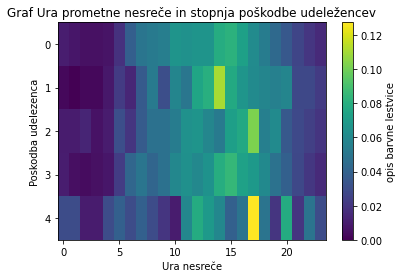

In [80]:
tabelaRelacij=makeTableOfOccurences("PoskodbaUdelezenca","UraPN",data19)
fig, ax = plt.subplots() 

tabelaRelacij.pop("Count")
im = ax.imshow(uraPoskodba, origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
ax.set_title("Graf Ura prometne nesreče in stopnja poškodbe udeležencev")
ax.set_ylabel("Poskodba udelezenca")
ax.set_xlabel("Ura nesreče")

In [81]:
heatMap=pd.crosstab(data19.PoskodbaUdelezenca,data19.Starost, normalize='index')
heatMap

Starost,-1,0,1,2,3,4,5,6,7,8,...,88,89,90,91,92,93,94,95,97,101
PoskodbaUdelezenca,,,,,,,,,,,,,,,,,,,,,
BREZ POŠKODBE,0.000886,0.000077,0.000077,0.000077,0.000193,0.000116,0.000077,0.000193,0.000077,0.000039,...,0.000770,0.000655,0.000501,0.000308,0.000154,0.000116,0.000116,0.000039,0.000039,0.000000
BREZ POŠKODBE-UZ,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002770,0.002770,0.000000,...,0.002770,0.000000,0.000000,0.000000,0.000000,0.002770,0.000000,0.000000,0.000000,0.000000
HUDA TELESNA POŠKODBA,0.000000,0.001220,0.000000,0.000000,0.002439,0.001220,0.002439,0.004878,0.002439,0.002439,...,0.003659,0.002439,0.002439,0.001220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LAŽJA TELESNA POŠKODBA,0.000000,0.001612,0.002785,0.002638,0.002345,0.003224,0.002345,0.002492,0.003957,0.004543,...,0.000733,0.001466,0.000293,0.000586,0.000586,0.000147,0.000147,0.000147,0.000147,0.000147
SMRT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009804,0.009804,0.000000,0.019608,0.000000,0.009804,0.000000,0.000000,0.000000,0.000000


In [88]:
pd.crosstab(data19.PoskodbaUdelezenca,data19.Starost, normalize='index').iloc[:,42:]

Starost,41,42,43,44,45,46,47,48,49,50,...,88,89,90,91,92,93,94,95,97,101
PoskodbaUdelezenca,,,,,,,,,,,,,,,,,,,,,
BREZ POŠKODBE,0.022756,0.022025,0.021563,0.019907,0.019984,0.019214,0.019483,0.018059,0.017134,0.017404,...,0.000770,0.000655,0.000501,0.000308,0.000154,0.000116,0.000116,0.000039,0.000039,0.000000
BREZ POŠKODBE-UZ,0.013850,0.013850,0.019391,0.022161,0.027701,0.019391,0.016620,0.011080,0.022161,0.022161,...,0.002770,0.000000,0.000000,0.000000,0.000000,0.002770,0.000000,0.000000,0.000000,0.000000
HUDA TELESNA POŠKODBA,0.015854,0.014634,0.019512,0.010976,0.010976,0.020732,0.012195,0.014634,0.014634,0.020732,...,0.003659,0.002439,0.002439,0.001220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LAŽJA TELESNA POŠKODBA,0.016269,0.015096,0.018320,0.017441,0.015829,0.013337,0.016708,0.014803,0.014949,0.012604,...,0.000733,0.001466,0.000293,0.000586,0.000586,0.000147,0.000147,0.000147,0.000147,0.000147
SMRT,0.019608,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.019608,0.000000,0.019608,...,0.009804,0.009804,0.000000,0.019608,0.000000,0.009804,0.000000,0.000000,0.000000,0.000000


Iz zgornih tabel je očitno, da mlajši vozniki utrpijo več lažjih poškod in smrtnih kot starejši, ki urpijo več hudih poškodb

In [95]:
pd.crosstab(data19.PoskodbaUdelezenca,data19.VozniskiStazVLetih, normalize='index')

VozniskiStazVLetih,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,72,73
PoskodbaUdelezenca,,,,,,,,,,,,,,,,,,,,,
BREZ POŠKODBE,0.199068,0.022602,0.022833,0.020600,0.019291,0.020099,0.017828,0.017635,0.018482,0.018790,...,0.000578,0.00027,0.00027,0.000039,0.000116,0.000039,0.000039,0.000039,0.000116,0.000039
BREZ POŠKODBE-UZ,0.490305,0.011080,0.011080,0.016620,0.016620,0.016620,0.016620,0.008310,0.011080,0.013850,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
HUDA TELESNA POŠKODBA,0.634146,0.008537,0.013415,0.008537,0.004878,0.014634,0.003659,0.010976,0.008537,0.013415,...,0.001220,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LAŽJA TELESNA POŠKODBA,0.521765,0.020665,0.015829,0.012018,0.015975,0.015243,0.011432,0.010992,0.013337,0.012898,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SMRT,0.549020,0.009804,0.009804,0.009804,0.009804,0.000000,0.000000,0.029412,0.000000,0.009804,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
tabelaRelacij=makeTableOfOccurences("UporabaVarnostnegaPasu","PoskodbaUdelezenca",data19)

In [59]:
tabelaRelacij=makeTableOfOccurences("UporabaVarnostnegaPasu","PoskodbaUdelezenca",data19)
tabelaRelacij.pop("Count")

UporabaVarnostnegaPasu
DA         27070
NE          3032
NEZNANO     3975
Name: Count, dtype: int64

In [53]:
tabelaRelacij

PoskodbaUdelezenca,BREZ POŠKODBE,BREZ POŠKODBE-UZ,HUDA TELESNA POŠKODBA,LAŽJA TELESNA POŠKODBA,SMRT
UporabaVarnostnegaPasu,,,,,
DA,21060,205,489,5260,56
NE,1745,68,251,932,36
NEZNANO,3166,88,80,631,10


In [100]:
vranostPas=pd.crosstab(data19.UporabaVarnostnegaPasu,data19.PoskodbaUdelezenca, normalize='index')
vranostPas

PoskodbaUdelezenca,BREZ POŠKODBE,BREZ POŠKODBE-UZ,HUDA TELESNA POŠKODBA,LAŽJA TELESNA POŠKODBA,SMRT
UporabaVarnostnegaPasu,,,,,
DA,0.777983,0.007573,0.018064,0.194311,0.002069
NE,0.575528,0.022427,0.082784,0.307388,0.011873
NEZNANO,0.796478,0.022138,0.020126,0.158742,0.002516


Iz zgornje tablele lahko vidimo, da so udeleženci, ki niso bili pripeti prejeli več poškodo ko pripeti.  

Text(0.5, 0, 'Poskodba udelezenca')

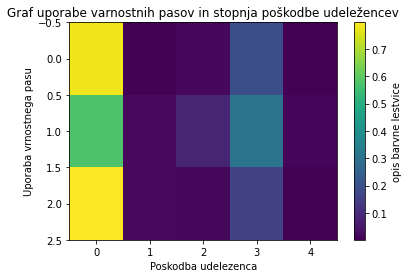

In [102]:
fig, ax = plt.subplots() 


im = ax.imshow(vranostPas, origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
ax.set_title("Graf uporabe varnostnih pasov in stopnja poškodbe udeležencev")
ax.set_ylabel("Uporaba vrnostnega pasu")
ax.set_xlabel("Poskodba udelezenca")

In [122]:
heatmapTable=pd.crosstab(data19.PoskodbaUdelezenca,data19.TipNesrece, normalize='index')
heatmapTable

TipNesrece,BOČNO TRČENJE,NALETNO TRČENJE,OPLAŽENJE,OSTALO,POVOŽENJE PEŠCA,POVOŽENJE ŽIVALI,PREVRNITEV VOZILA,TRČENJE V OBJEKT,TRČENJE V STOJEČE / PARKIRANO VOZILO,ČELNO TRČENJE
PoskodbaUdelezenca,,,,,,,,,,
BREZ POŠKODBE,0.204382,0.148627,0.165839,0.078280,0.019714,0.009280,0.017057,0.082669,0.203227,0.070925
BREZ POŠKODBE-UZ,0.138504,0.055402,0.180055,0.124654,0.027701,0.030471,0.005540,0.094183,0.293629,0.049861
HUDA TELESNA POŠKODBA,0.164634,0.054878,0.041463,0.141463,0.115854,0.002439,0.186585,0.096341,0.012195,0.184146
LAŽJA TELESNA POŠKODBA,0.220871,0.171186,0.044262,0.100542,0.066100,0.005716,0.106112,0.074161,0.052470,0.158581
SMRT,0.166667,0.068627,0.009804,0.009804,0.137255,0.000000,0.147059,0.205882,0.000000,0.254902


Text(0, 0.5, 'Poskodba udelezenca')

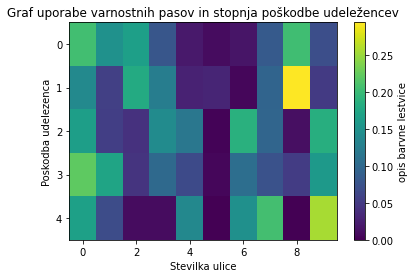

In [123]:
fig, ax = plt.subplots() 


im = ax.imshow(heatmapTable, origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
ax.set_title("Graf uporabe varnostnih pasov in stopnja poškodbe udeležencev")
ax.set_xlabel("Vrsta ")
ax.set_ylabel("Poskodba udelezenca")

In [113]:
vranostPas=pd.crosstab(data19.PoskodbaUdelezenca,data19.UEStalnegaPrebivalisca, normalize='index')
vranostPas

UEStalnegaPrebivalisca,AJDOVŠČINA,BREŽICE,CELJE,CERKNICA,DOMŽALE,DRAVOGRAD,GORNJA RADGONA,GROSUPLJE,HRASTNIK,IDRIJA,...,TREBNJE,TRŽIČ,VELENJE,VRHNIKA,ZAGORJE OB SAVI,ČRNOMELJ,ŠENTJUR PRI CELJU,ŠKOFJA LOKA,ŠMARJE PRI JELŠAH,ŽALEC
PoskodbaUdelezenca,,,,,,,,,,,,,,,,,,,,,
BREZ POŠKODBE,0.009034,0.006832,0.042159,0.007371,0.029619,0.004180,0.007686,0.023731,0.003641,0.005843,...,0.010203,0.005978,0.018113,0.010203,0.006562,0.007551,0.014383,0.018158,0.018877,0.018742
BREZ POŠKODBE-UZ,0.006410,0.006410,0.028846,0.006410,0.038462,0.006410,0.012821,0.003205,0.003205,0.000000,...,0.000000,0.076923,0.009615,0.006410,0.012821,0.003205,0.006410,0.000000,0.006410,0.012821
HUDA TELESNA POŠKODBA,0.015278,0.013889,0.050000,0.008333,0.030556,0.004167,0.006944,0.016667,0.001389,0.011111,...,0.006944,0.005556,0.020833,0.008333,0.006944,0.002778,0.008333,0.033333,0.013889,0.025000
LAŽJA TELESNA POŠKODBA,0.007117,0.009220,0.056131,0.004853,0.022323,0.005176,0.006309,0.011970,0.004529,0.006794,...,0.009382,0.006470,0.026690,0.006632,0.006309,0.009867,0.016014,0.014073,0.025720,0.024102
SMRT,0.023529,0.023529,0.035294,0.000000,0.011765,0.000000,0.011765,0.011765,0.011765,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.011765,0.000000,0.082353,0.035294,0.011765,0.023529


Text(0.5, 0, 'Poskodba udelezenca')

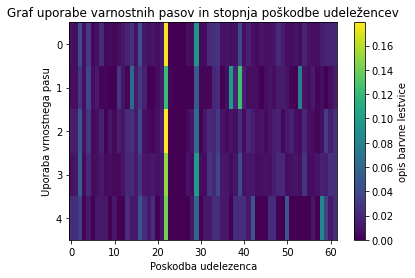

In [114]:
fig, ax = plt.subplots() 


im = ax.imshow(vranostPas, origin='upper', aspect='auto', interpolation='None')

fig.colorbar(im, ax=ax, label="opis barvne lestvice")
ax.set_title("Graf uporabe varnostnih pasov in stopnja poškodbe udeležencev")
ax.set_xlabel("Stevilka ulice")
ax.set_ylabel("Poskodba udelezenca")

V sloveniji obstajajo neke ulice kjer lahko utrpimo hujše poškode kot v drugih ulicah